# Entrenar un modelo de clasificación de dígitos manuscritos en Tensorflow.

In [221]:
import tensorflow as tf
print(tf.__version__)
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


2.15.0


*Código auxiliar*

In [232]:
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["acc"],label='train accuracy')
    plt.plot(history["val_acc"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Carga de datos

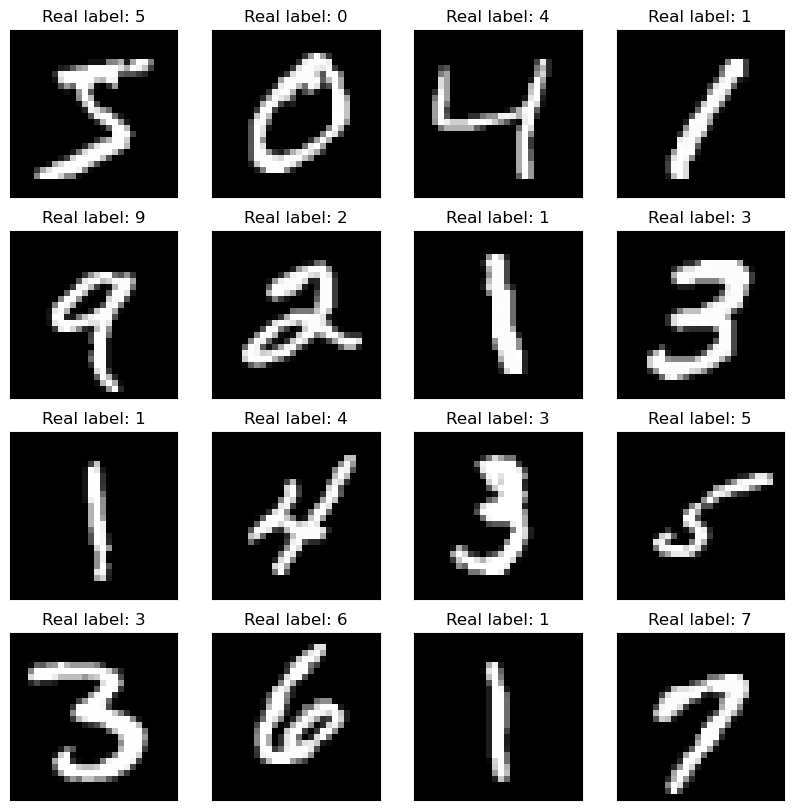

In [226]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # se fijan en un intervalo de 0 a 1 dividiendo los valores de los píxeles por 255

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # convirtió cada imagen en un vector
x_test = x_test.reshape((-1, 28*28))

In [227]:
path = Path("model_mnist")
path.mkdir(exist_ok=True) # crear una carpeta en el disco
assert path.exists()
cpt_filename = "best_checkpoint.hdf5" 
cpt_path = str(path.joinpath(cpt_filename))

In [228]:
def get_compiled_model():
    """
    La función devuelve el modelo compilado para la clasificación binaria
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Компиляция модели
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = get_compiled_model()
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3012 - accuracy: 0.9126 - val_loss: 0.1437 - val_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1439 - accuracy: 0.9576 - val_loss: 0.1044 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9665 - val_loss: 0.0872 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9715 - val_loss: 0.0791 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9761 - val_loss: 0.0716 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9789 - val_loss: 0.0727 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0711 - val_accuracy

In [229]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='min')

In [230]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0430 - accuracy: 0.9854
Epoch 1: val_loss improved from inf to 0.07909, saving model to model_mnist\best_checkpoint.hdf5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0430 - accuracy: 0.9854 - val_loss: 0.0791 - val_accuracy: 0.9791
Epoch 2/10
  21/1875 [..............................] - ETA: 5s - loss: 0.0417 - accuracy: 0.9836

C:\Users\Ульяна\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1873/1875 [============================>.] - ETA: 0s - loss: 0.0385 - accuracy: 0.9869
Epoch 2: val_loss improved from 0.07909 to 0.07131, saving model to model_mnist\best_checkpoint.hdf5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9869 - val_loss: 0.0713 - val_accuracy: 0.9812
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9874
Epoch 3: val_loss improved from 0.07131 to 0.07113, saving model to model_mnist\best_checkpoint.hdf5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0362 - accuracy: 0.9874 - val_loss: 0.0711 - val_accuracy: 0.9807
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9881
Epoch 4: val_loss did not improve from 0.07113
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9881 - val_loss: 0.0724 - val_accuracy: 0.9804
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - los

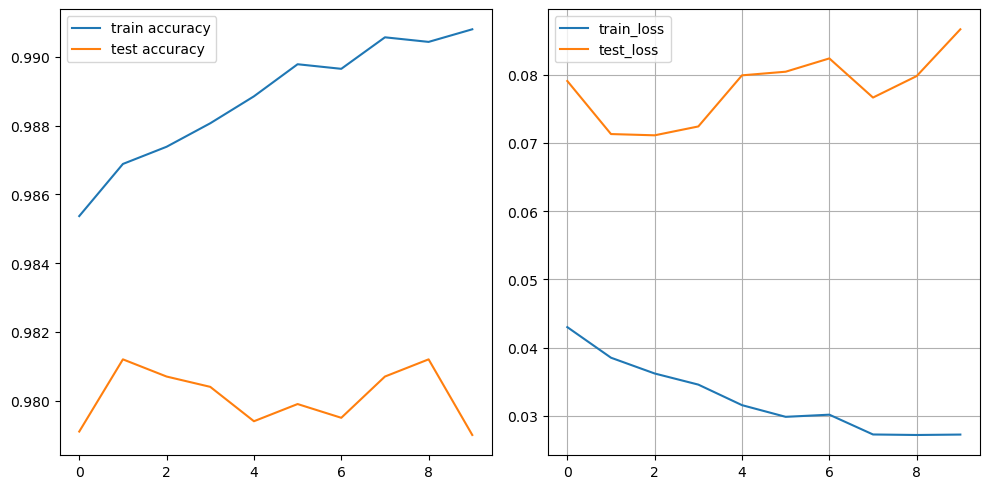

In [237]:
show_progress({
    'acc': history.history['accuracy'],
    'val_acc': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
})


In [238]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model: {acc*100:.2f}%")
assert acc > 0.96, "Accuracy should be greater than 0.96"

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9807
Accuracy of restored model: 98.07%


313/313 [==============================] - 0s 1ms/step


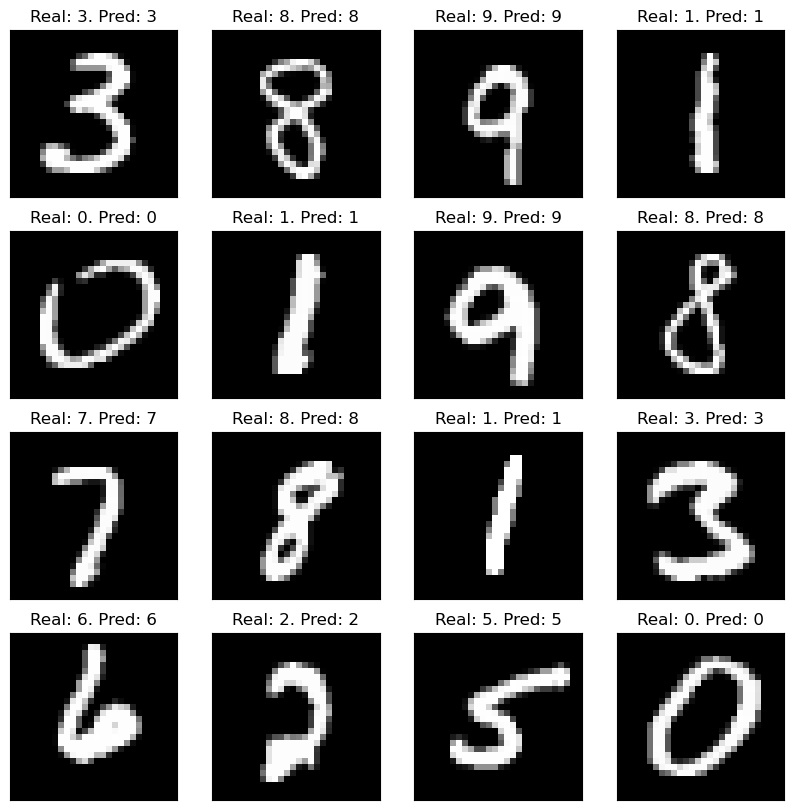

In [240]:
predicted_labels = np.argmax(restored_model.predict(x_test), axis=1)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])